In [6]:
import numpy as np
import matplotlib.pyplot as plt
import assimulo.problem as apro
import matplotlib.pyplot as mpl
import assimulo.solvers as asol
import BDF4Solver
import BDF2Solver 
import EESolver

# Paramters for the elastic pendulum
m = 1.0      # mass
k = 10    # spring constant
L0 = 1.0     # natural length of the spring
g = 1.0     # acceleration due to gravity

def elastic_pendulum(t,y):
    yvec = np.zeros_like(y)
    yvec[0] = y[2]
    yvec[1] = y[3]
    lam = k * (np.sqrt(y[0]**2 + y[1]**2) - 1) / np.sqrt(y[0]**2 + y[1]**2)
    yvec[2] = -1*y[0]*lam
    yvec[3] = -1*y[1]*lam - 1
    return yvec

# Define Problem 
initial_conditions = [0.0, 1.1, 0.1, 0.0]  # initial position (x,y) and velocity (vx, vy)
eP_Problem = apro.Explicit_Problem(elastic_pendulum, t0 = 0, y0 = initial_conditions)
eP_Problem.name = r'Elastic Pendulum (m={m}, k={k}, L0={L0}, g={g})'
eP_Problem.name = eP_Problem.name.format(m=m, k=k, L0=L0, g=g)


CVode Solution

Final Run Statistics: Elastic Pendulum (m=1.0, k=10, L0=1.0, g=1.0) 

 Number of steps                                 : 120
 Number of function evaluations                  : 131
 Number of Jacobian evaluations                  : 3
 Number of function eval. due to Jacobian eval.  : 12
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 128
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 4.0 seconds.
Elapsed simulation time: 0.0031999999773688614 seconds.


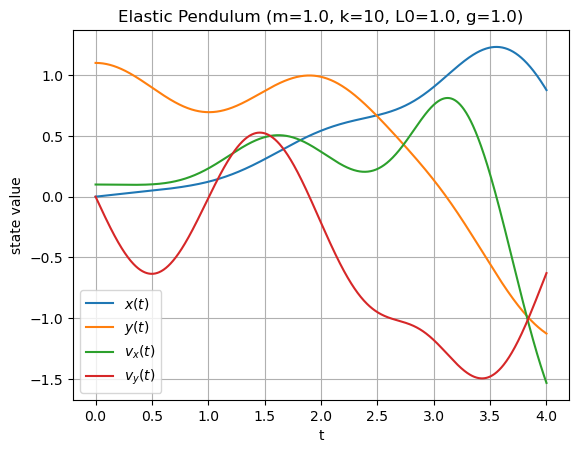

In [7]:
# CVode Solver
eP_Solver = asol.CVode(eP_Problem)
eP_Solver.reset() # Why is this needed here?
t_sol, x_sol = eP_Solver.simulate(4, 1000) # simulate(tf, ncp)

# Plot Results
plt.figure()

plt.plot(t_sol, x_sol[:,0], label=r'$x(t)$')
plt.plot(t_sol, x_sol[:,1], label=r'$y(t)$')
plt.plot(t_sol, x_sol[:,2], label=r'$v_x(t)$')
plt.plot(t_sol, x_sol[:,3], label=r'$v_y(t)$')

plt.xlabel('t')
plt.ylabel('state value')
plt.legend()
plt.title(eP_Problem.name)
plt.grid(True)
plt.show()



BDF4 Solution

Final Run Statistics            : Elastic Pendulum (m=1.0, k=10, L0=1.0, g=1.0) 

 Step-length                    : 0.01 
 Number of Steps                : 401
 Number of Function Evaluations : 1200

Solver options:

 Solver            : BDF4
 Solver type       : Fixed step

Simulation interval    : 0.0 - 4.0 seconds.
Elapsed simulation time: 0.2663490000413731 seconds.


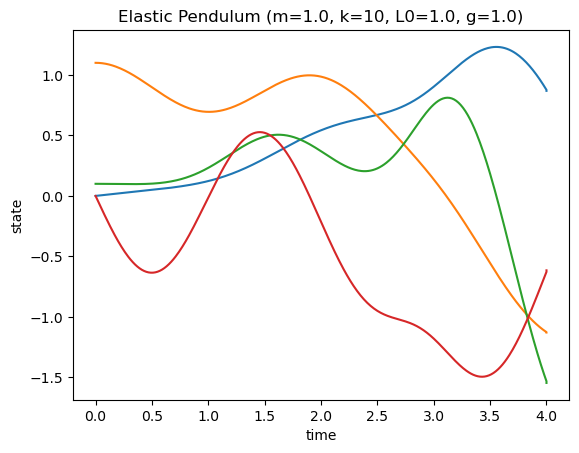

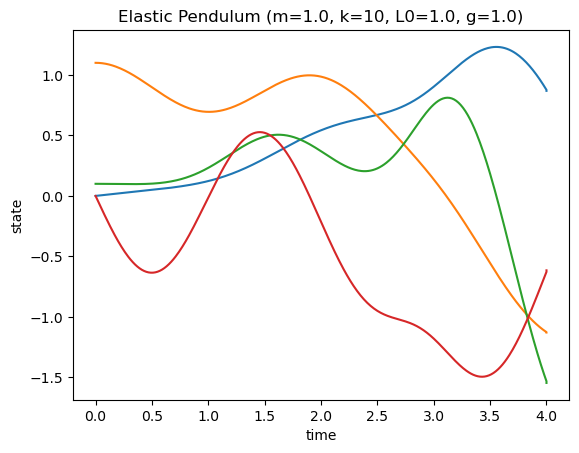

In [8]:
# Our Solution with BDF4
exp_sim = BDF4Solver.BDF4(eP_Problem) #Create a BDF solver
exp_sim.reset()
t, y = exp_sim.simulate(4)
exp_sim.plot()
mpl.figure()
exp_sim.plot()
mpl.show()



BDF2 Solution

Final Run Statistics            : Elastic Pendulum (m=1.0, k=10, L0=1.0, g=1.0) 

 Step-length                    : 0.01 
 Number of Steps                : 401
 Number of Function Evaluations : 1998

Solver options:

 Solver            : BDF2
 Solver type       : Fixed step

Simulation interval    : 0.0 - 4.0 seconds.
Elapsed simulation time: 0.03420310001820326 seconds.


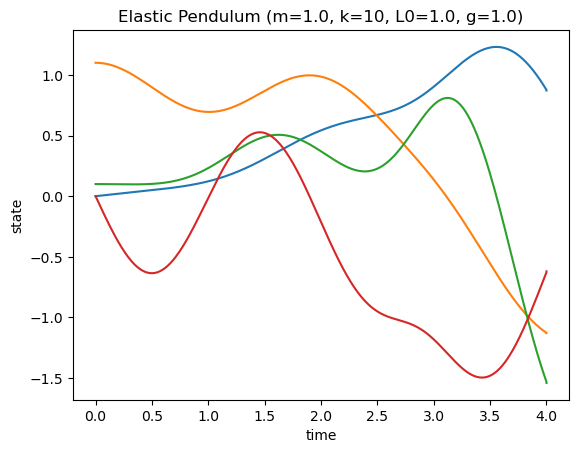

In [9]:

exp_sim = BDF2Solver.BDF_2(eP_Problem) #Create a BDF solver
exp_sim.reset()
t, y = exp_sim.simulate(4)
mpl.figure()
exp_sim.plot()
mpl.show()

Final Run Statistics            : Elastic Pendulum (m=1.0, k=10, L0=1.0, g=1.0) 

 Step-length                    : 0.01 
 Number of Steps                : 401
 Number of Function Evaluations : 401

Solver options:

 Solver            : Explicit Euler
 Solver type       : Fixed step

Simulation interval    : 0.0 - 4.0 seconds.
Elapsed simulation time: 0.003906300000380725 seconds.


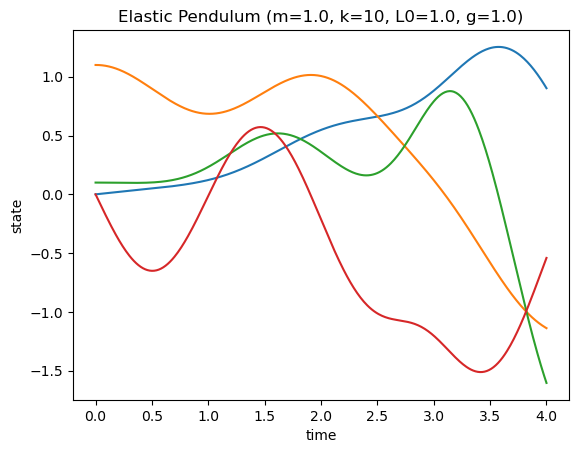

In [ ]:
exp_sim = EESolver.Explicit_Euler(eP_Problem) #Create a BDF solver
exp_sim.reset()
t, y = exp_sim.simulate(4)
mpl.figure()
mpl.plot(t, y[:,0], label='x')
mpl.plot(t, y[:,1], label='y')
mpl.legend()
mpl.title("BDF4")
mpl.show()